# Data collection and Preprocessing

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if we need to change directory to the project root
if os.path.basename(current_dir) == 'Scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'Scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import modules
try:
    from Preprocessing import ReviewPreprocessor
    try:
        from Scraper import main as run_scraper
    except ImportError:
        from Scraper import main as run_scraper
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from Preprocessing import ReviewPreprocessor
    from Scraper import main as run_scraper

Current working directory: c:\Users\HP\Desktop\Tenx_challenge_folder\Customer_Experience_Analytics_for_Fintech_Apps\Scripts
Changed working directory to: c:\Users\HP\Desktop\Tenx_challenge_folder\Customer_Experience_Analytics_for_Fintech_Apps


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [7]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.322496
Total Ratings: 38790
Total Reviews: 8327

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking&hl=en
Current Rating: 4.2150536
Total Ratings: 6308
Total Reviews: 1216

DashenBank: Dashen bank
App ID: com.dashen.dashensuperapp&hl=en
Current Rating: 4.143498
Total Ratings: 3882
Total Reviews: 768

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 4000 reviews
Collected 4000 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:06<00:12,  6.30s/it]


Scraping reviews for com.boa.boaMobileBanking&hl=en...
Successfully scraped 0 reviews


Banks:  67%|██████▋   | 2/3 [00:14<00:07,  7.15s/it]


Scraping reviews for com.dashen.dashensuperapp&hl=en...
Successfully scraped 0 reviews


Banks: 100%|██████████| 3/3 [00:17<00:00,  5.95s/it]


Scraping Complete!

Total reviews collected: 4000
Reviews per bank:
  Commercial Bank of Ethiopia: 4000
  Bank of Abyssinia: 0
  Dashen bank: 0

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: It is nice app...
Date: 2025-11-26 12:03:18

Rating: ⭐⭐⭐⭐⭐
Review: best...
Date: 2025-11-25 20:27:20

Rating: ⭐⭐⭐⭐⭐
Review: good app...
Date: 2025-11-25 18:10:35

✅ Scraping Finished.


,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,3d88a334-958c-4717-9f97-c5d46359e054,It is nice app,5,2025-11-26 12:03:18,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,99d376ea-4824-4af9-a093-27360acc3a5c,best,5,2025-11-25 20:27:20,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,f1861daf-a1ed-407a-9e7c-295edbb3877d,good app,5,2025-11-25 18:10:35,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,fd178fb7-7026-4d02-98a0-5c86c3bd56f5,it suddenly asked me to enter the verification...,1,2025-11-25 17:14:22,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,571c66c6-fd18-437b-b8e5-8c443e9db2df,nice app...,5,2025-11-25 10:24:19,A Google user,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor` method.

In [2]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 4000 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 3999 (99.98%)
  app_id: 723 (18.07%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-02-11 to 2025-11-26

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 4000 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 4000
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 4000

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Commercial Bank of Ethiopia: 4000

Rating distribution:
  ⭐⭐⭐⭐⭐: 2730 (68.2%)
  ⭐⭐⭐⭐: 351 (8.8%)
  ⭐⭐⭐: 221 (5.5%)
  ⭐⭐: 154 (3.9%)
  ⭐: 544 (13.6%)

Date range: 2024-02-11 to 2025-11-26

Text statistics:
  Average length: 39 characters


## 3. Visualizations

explore the cleaned data.

C:\Users\HP\AppData\Local\Temp\ipykernel_19900\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_19900\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


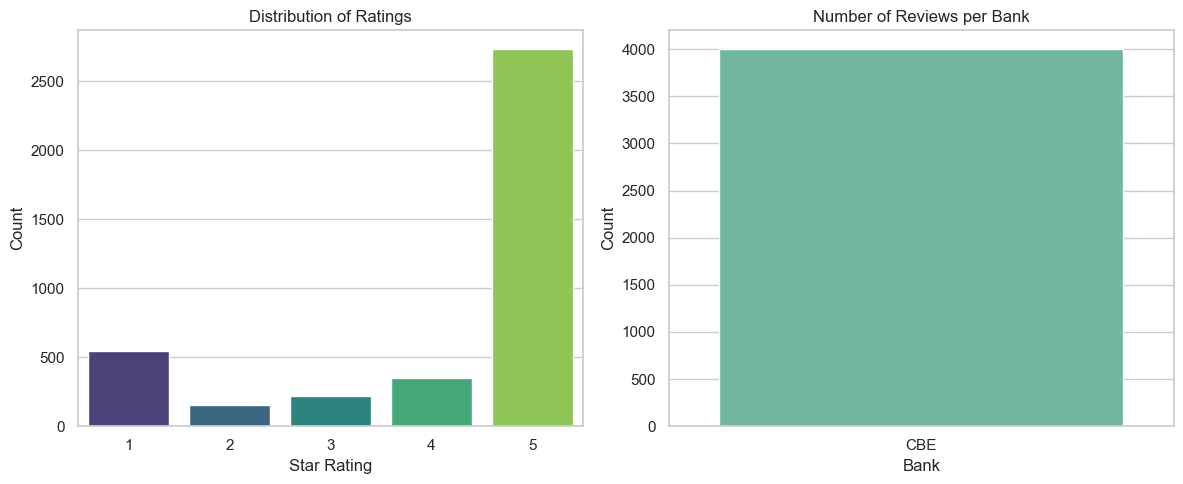

In [3]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

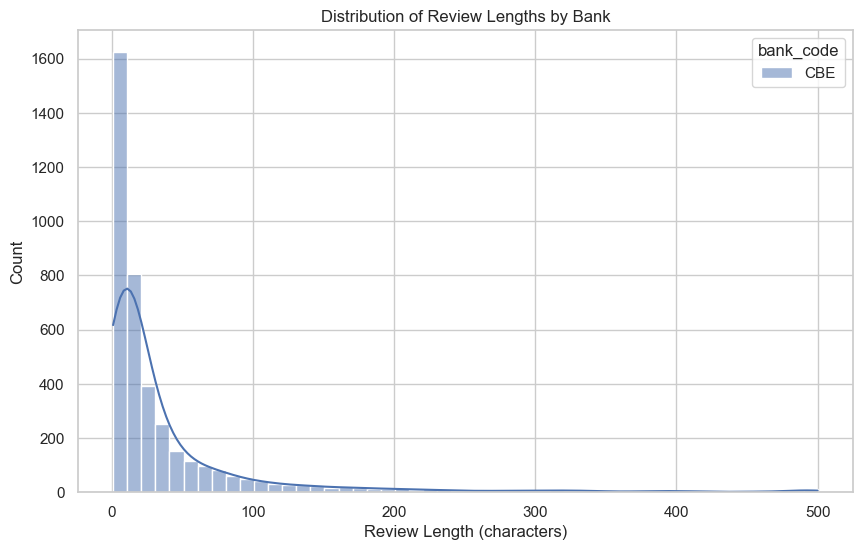

In [4]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()